# Imports

In [11]:
from config import *
from core import *
from helper import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sys import getsizeof
from scipy.optimize import least_squares

# Config

In [12]:
frequencies = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
bases = [10, 15, 20]
qtables = [
    PHOTOSHOP_00_LUM,
    PHOTOSHOP_FOR_WEB_090_LUM,
    PHOTOSHOP_FOR_WEB_100_LUM,
]
img_path = SAMPLE_IMG_PATHS[0]
b = generate_benford_feature(img_path, frequencies, bases, qtables, False)

print(b)

              File: data/1012343_edited-1.jpg
     Feature shape: (3, 10, 3, 2)
       Frequencies: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
             Bases: 10, 15, 20
Quantization tables: ['PHOTOSHOP_FOR_WEB_090_LUM', 'PHOTOSHOP_FOR_WEB_100_LUM']
             Label: False


# Run Sample

In [14]:
img = load_image_from_file(img_path)

# Get DCT Coefficients
dct_coeffs = get_image_dct_coefs(img, frequencies, [q.matrix for q in qtables])

features = np.zeros((3, len(frequencies), len(bases), len(qtables)))

pmfs = []

for i,base in enumerate(bases):
    # Get DCT Coefficient First Digits
    fds = dct_coeff_to_first_digit(dct_coeffs, base)

    # Get FD pmf
    pmfs.append(get_dct_fd_pmf(fds, base))

# Plots

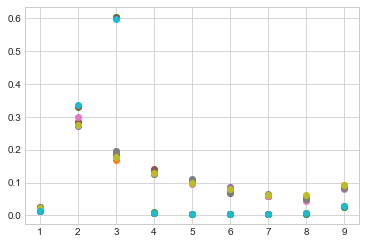

In [38]:
ds10 = [i+1 for i in range(10-1)]
ds15 = [i+1 for i in range(15-1)]
ds20 = [i+1 for i in range(20-1)]
for i in range(pmfs[0].shape[1]):
    plt.plot(ds10, pmfs[0][:,i,1], 'o')


In [36]:
dct_coeffs[:, 0, 0]

array([1664., 2660., 2670., ...,    0.,    0.,    0.])

In [13]:
xs.x
# mmse_benford_cost(xs.x, pmf, 10)

array([ 0.43899218, -0.69242182,  0.66126538])

0.004970971541243202
0.005835490880298619
0.00950921475778887


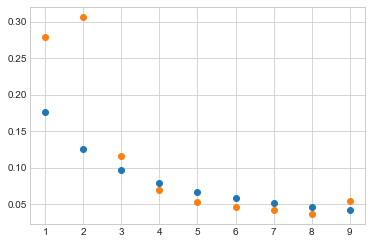

In [26]:
plt.plot(ds, pmf_ben, 'o')
plt.plot(ds, pmf[:,4,0], 'o')

print(mean_squared_error(pmf[:,4,0], pmf_ben))
print(mean_squared_error(pmf[:,5,0], pmf_ben))
print(mean_squared_error(pmf[:,6,0], pmf_ben))